## EDA theo hướng phân tán (Dispersion)

các mục cần làm là tính:
1. Range - khoảng biến thiên
2. Quartile - tứ phân vị
3. Interquartile Range (IQR) - độ trải giữa (khoảng tứ phân vị)
4. Variance - phương sai
5. Standard deviation (std) - độ lệch chuẩn
6. Coefficient of Variation (CV) - hệ số biến thiên


### Thêm các thư viện cần thiết

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns

### Đọc data

In [2]:
data = pd.read_csv('../data/interim/handled_missing_values.csv')
data

,Gender,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Physical_Activity,...,Mental_Health,Sleep,Stress,Pollution,Sun_Exposure,Education,Income,Age,Systolic_BP,Diastolic_BP
0,Male,171.148359,86.185197,259.465814,29.423017,157.652848,0.132868,0.200000,58.786198,Moderate,...,Good,Insomnia,2.797064,5.142344,7.108975,Undergraduate,Medium,89,151,109
1,Male,172.946206,79.641937,263.630292,26.626847,118.507805,0.629534,0.267312,54.635270,Low,...,Good,Normal,9.339930,7.272720,3.918489,Undergraduate,Medium,77,134,112
2,Female,155.945488,49.167058,207.846206,20.217553,143.587550,0.473487,0.248667,54.564632,Moderate,...,Poor,Insomnia,9.234637,8.500386,5.393408,Undergraduate,Medium,70,160,101
3,Female,169.078298,56.017921,253.283779,19.595270,137.448581,1.184315,0.513818,79.722963,Moderate,...,Poor,Insomnia,4.693446,7.555511,2.745578,Undergraduate,Low,52,133,94
4,Female,163.758355,73.966304,236.119899,27.582078,145.328695,0.434562,0.306864,52.479469,Low,...,Good,Normal,4.038537,9.429097,3.878435,Undergraduate,High,79,170,106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Male,161.632502,88.323405,204.175510,33.807917,112.075747,1.583006,0.665907,27.997736,Moderate,...,Fair,Normal,8.091897,9.846088,9.111205,Undergraduate,High,22,134,91
2996,Male,163.443512,93.217007,197.384424,34.894725,101.177692,1.785129,0.720304,32.866623,Low,...,Good,Normal,2.427081,1.141303,8.578184,Undergraduate,Medium,19,110,78
2997,Male,177.857644,86.258847,238.641542,27.268332,110.548146,0.366012,0.200000,39.756270,Moderate,...,Fair,Normal,7.671837,5.101134,2.199199,Undergraduate,Low,85,159,116
2998,Female,162.287164,41.371018,198.244328,15.708252,123.704379,1.452963,0.648158,43.338594,Moderate,...,Good,Insomnia,7.920076,4.452130,5.051613,Undergraduate,High,30,134,82


### Kiểm tra các kiểu của dữ liệu

In [3]:
data.dtypes

Gender                 object
Height                float64
Weight                float64
Cholesterol           float64
BMI                   float64
Blood_Glucose         float64
Bone_Density          float64
Vision                float64
Hearing               float64
Physical_Activity      object
Smoking                object
Alcohol                object
Diet                   object
Chronic_Diseases       object
Medication             object
Family_History         object
Cognitive_Function    float64
Mental_Health          object
Sleep                  object
Stress                float64
Pollution             float64
Sun_Exposure          float64
Education              object
Income                 object
Age                     int64
Systolic_BP             int64
Diastolic_BP            int64
dtype: object

### Xem tóm tắt của data

In [4]:
data.describe()

,Height,Weight,Cholesterol,BMI,Blood_Glucose,Bone_Density,Vision,Hearing,Cognitive_Function,Stress,Pollution,Sun_Exposure,Age,Systolic_BP,Diastolic_BP
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,168.590835,72.537260,234.029794,25.550146,126.653909,0.931899,0.474591,47.016214,63.868376,5.476507,5.028982,5.955785,53.485667,146.027333,95.567000
std,9.293006,13.190734,24.521436,4.367322,18.226124,0.443550,0.209726,14.336464,11.755738,2.584901,2.871408,3.474595,20.569690,15.968080,9.923256
min,141.130985,32.537672,148.811514,12.049900,69.866884,-0.219787,0.200000,0.000000,30.382098,1.000428,0.006395,0.002055,18.000000,97.000000,60.000000
25%,161.629515,63.222773,216.756601,22.454115,114.392605,0.561063,0.281671,36.734775,55.647794,3.221745,2.607185,2.873285,36.000000,135.000000,89.000000
50%,168.215632,71.448651,234.376822,25.352113,126.802186,0.939585,0.462070,46.963733,64.014652,5.496618,5.095686,5.956789,53.000000,146.000000,95.000000
75%,175.522665,81.702801,250.646674,28.403543,139.377079,1.294570,0.639498,56.828847,72.087453,7.680320,7.476338,8.991349,72.000000,157.000000,103.000000
max,198.112215,123.598603,331.300589,43.329869,185.736144,1.999829,1.062537,94.003824,106.479831,9.996323,9.998090,11.992504,89.000000,193.000000,133.000000


### lấy ra các cột là biến số

In [5]:
numeric_columns = data.select_dtypes(include=['number']).columns
print("Các cột có kiểu số:")
print(numeric_columns)


Các cột có kiểu số:
Index(['Height', 'Weight', 'Cholesterol', 'BMI', 'Blood_Glucose',
       'Bone_Density', 'Vision', 'Hearing', 'Cognitive_Function', 'Stress',
       'Pollution', 'Sun_Exposure', 'Age', 'Systolic_BP', 'Diastolic_BP'],
      dtype='object')


### lấy ra các cột là biến phân loại

In [6]:
categorical_features = data.select_dtypes(include=['object', 'category']).columns
print("Các cột có kiểu category:")
print(categorical_features)

Các cột có kiểu category:
Index(['Gender', 'Physical_Activity', 'Smoking', 'Alcohol', 'Diet',
       'Chronic_Diseases', 'Medication', 'Family_History', 'Mental_Health',
       'Sleep', 'Education', 'Income'],
      dtype='object')


In [7]:
df = pd.DataFrame(data)

### Tính các range của các biến số

In [8]:
for col in numeric_columns:
    col_range = data[col].max() - data[col].min()
    print(f"Range của {col}: {col_range}")

Range của Height: 56.98123043155178
Range của Weight: 91.06093093023375
Range của Cholesterol: 182.48907542498767
Range của BMI: 31.279969670157726
Range của Blood_Glucose: 115.86926006866871
Range của Bone_Density: 2.2196160983475623
Range của Vision: 0.8625374576346181
Range của Hearing: 94.00382427807536
Range của Cognitive_Function: 76.0977325829051
Range của Stress: 8.995894720116976
Range của Pollution: 9.99169512584789
Range của Sun_Exposure: 11.990449193491337
Range của Age: 71
Range của Systolic_BP: 96
Range của Diastolic_BP: 73


### Tính độ lệch chuẩn, phương sai và hệ số biến thiên

In [9]:
print("Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:")
for col in numeric_columns:
    std_dev = data[col].std()
    variance = data[col].var()
    mean = data[col].mean()
    cv = (std_dev / mean) * 100
    print(f"{col} - Độ lệch chuẩn: {std_dev:.2f}, phương sai: {variance:.2f}, Hệ số biến thiên: {cv:.2f}%")

Độ lệch chuẩn, phương sai và hệ số biến thiên của các cột số:
Height - Độ lệch chuẩn: 9.29, phương sai: 86.36, Hệ số biến thiên: 5.51%
Weight - Độ lệch chuẩn: 13.19, phương sai: 174.00, Hệ số biến thiên: 18.18%
Cholesterol - Độ lệch chuẩn: 24.52, phương sai: 601.30, Hệ số biến thiên: 10.48%
BMI - Độ lệch chuẩn: 4.37, phương sai: 19.07, Hệ số biến thiên: 17.09%
Blood_Glucose - Độ lệch chuẩn: 18.23, phương sai: 332.19, Hệ số biến thiên: 14.39%
Bone_Density - Độ lệch chuẩn: 0.44, phương sai: 0.20, Hệ số biến thiên: 47.60%
Vision - Độ lệch chuẩn: 0.21, phương sai: 0.04, Hệ số biến thiên: 44.19%
Hearing - Độ lệch chuẩn: 14.34, phương sai: 205.53, Hệ số biến thiên: 30.49%
Cognitive_Function - Độ lệch chuẩn: 11.76, phương sai: 138.20, Hệ số biến thiên: 18.41%
Stress - Độ lệch chuẩn: 2.58, phương sai: 6.68, Hệ số biến thiên: 47.20%
Pollution - Độ lệch chuẩn: 2.87, phương sai: 8.24, Hệ số biến thiên: 57.10%
Sun_Exposure - Độ lệch chuẩn: 3.47, phương sai: 12.07, Hệ số biến thiên: 58.34%
Age - Độ

### Tính khoảng trải giữa

In [10]:
print("Interquartile Range (IQR) của các cột số:")
for col in numeric_columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    print(f"{col} - IQR: {IQR:.2f}")

Interquartile Range (IQR) của các cột số:
Height - IQR: 13.89
Weight - IQR: 18.48
Cholesterol - IQR: 33.89
BMI - IQR: 5.95
Blood_Glucose - IQR: 24.98
Bone_Density - IQR: 0.73
Vision - IQR: 0.36
Hearing - IQR: 20.09
Cognitive_Function - IQR: 16.44
Stress - IQR: 4.46
Pollution - IQR: 4.87
Sun_Exposure - IQR: 6.12
Age - IQR: 36.00
Systolic_BP - IQR: 22.00
Diastolic_BP - IQR: 14.00


### Vẽ box plot

### Các biến phân loại

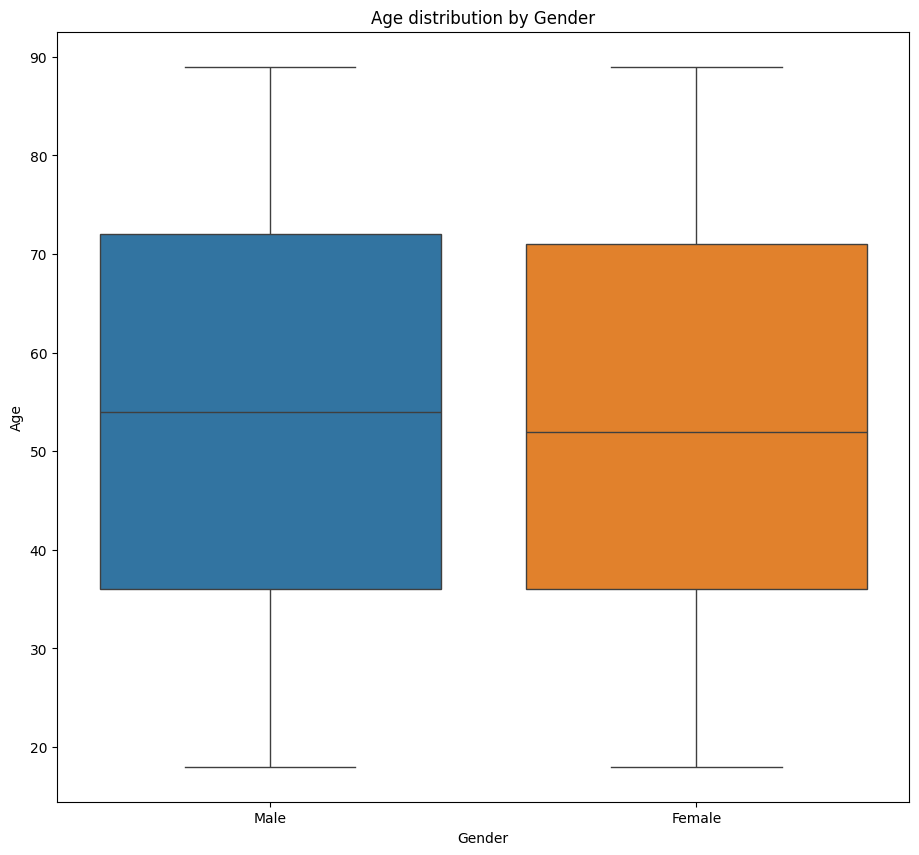

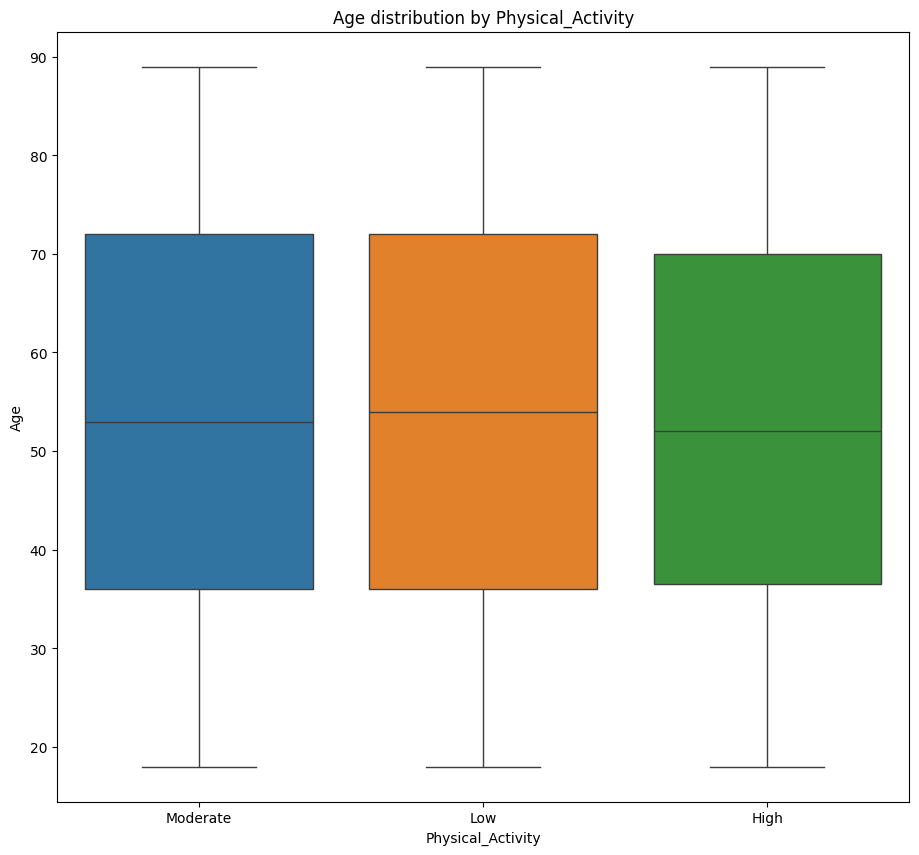

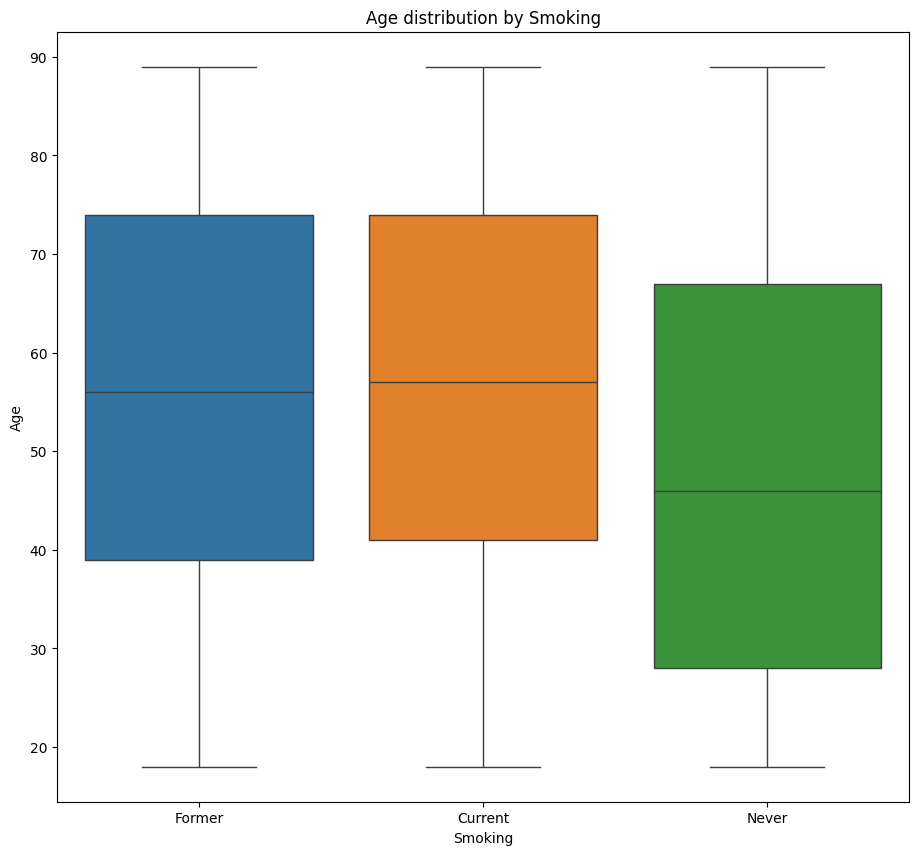

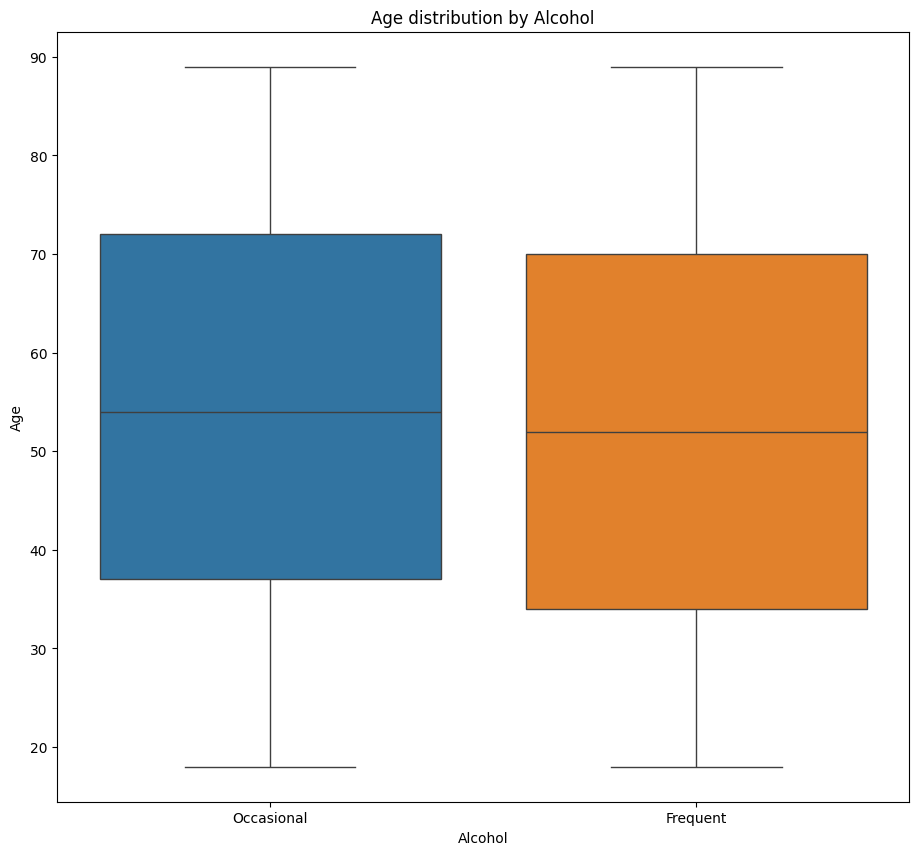

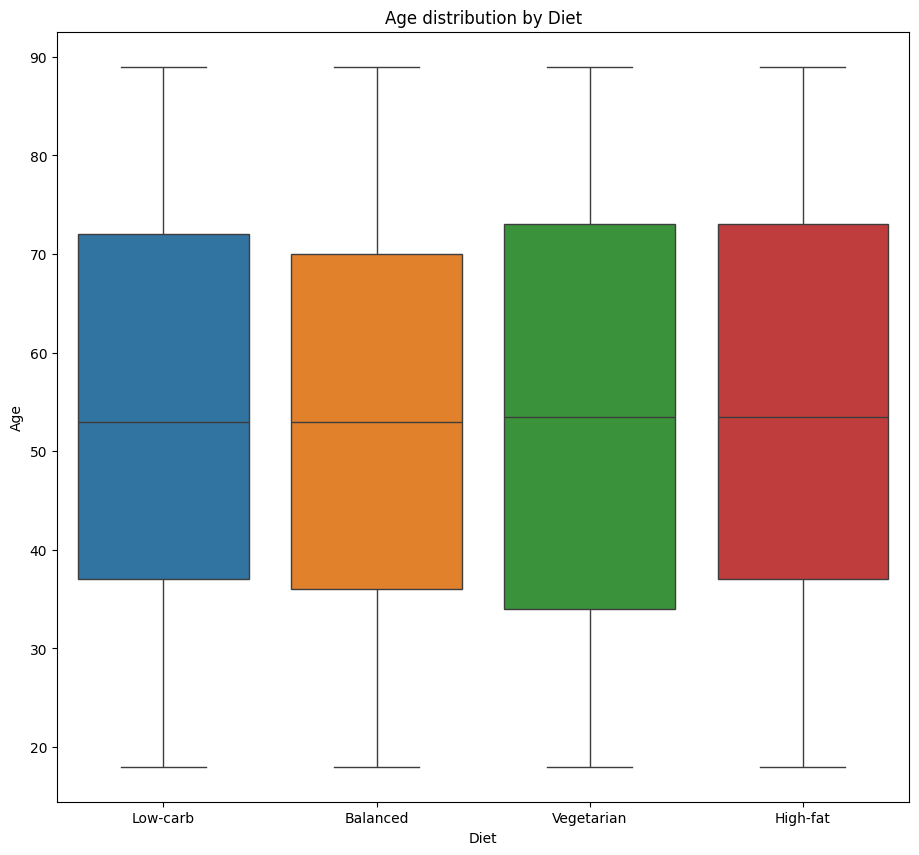

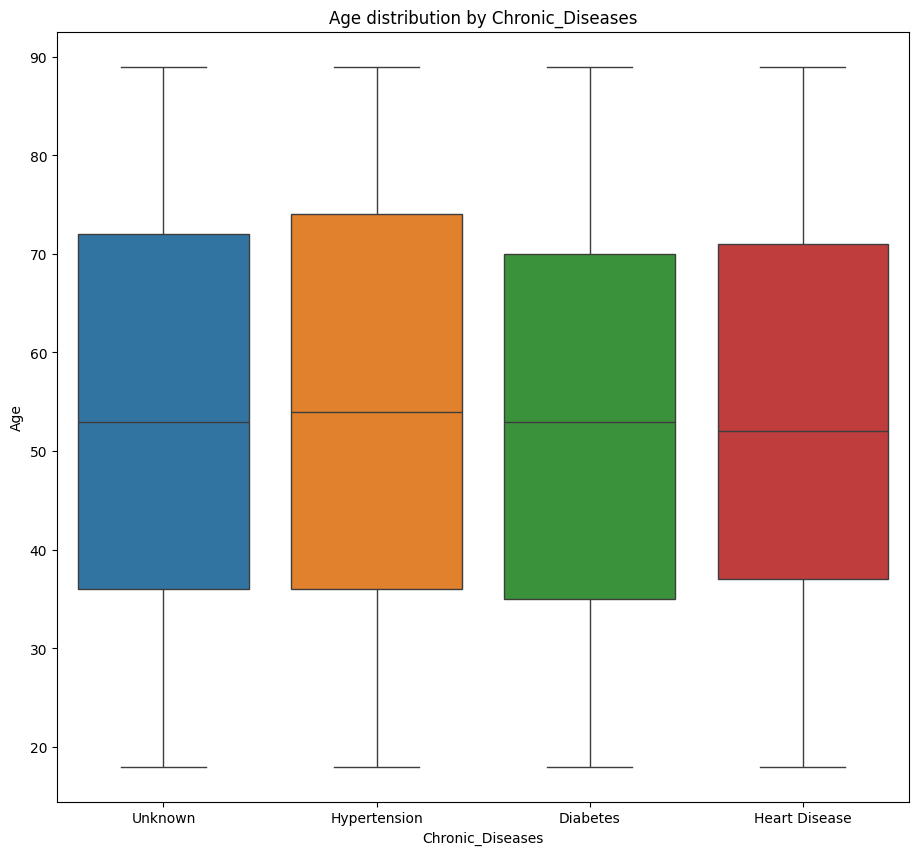

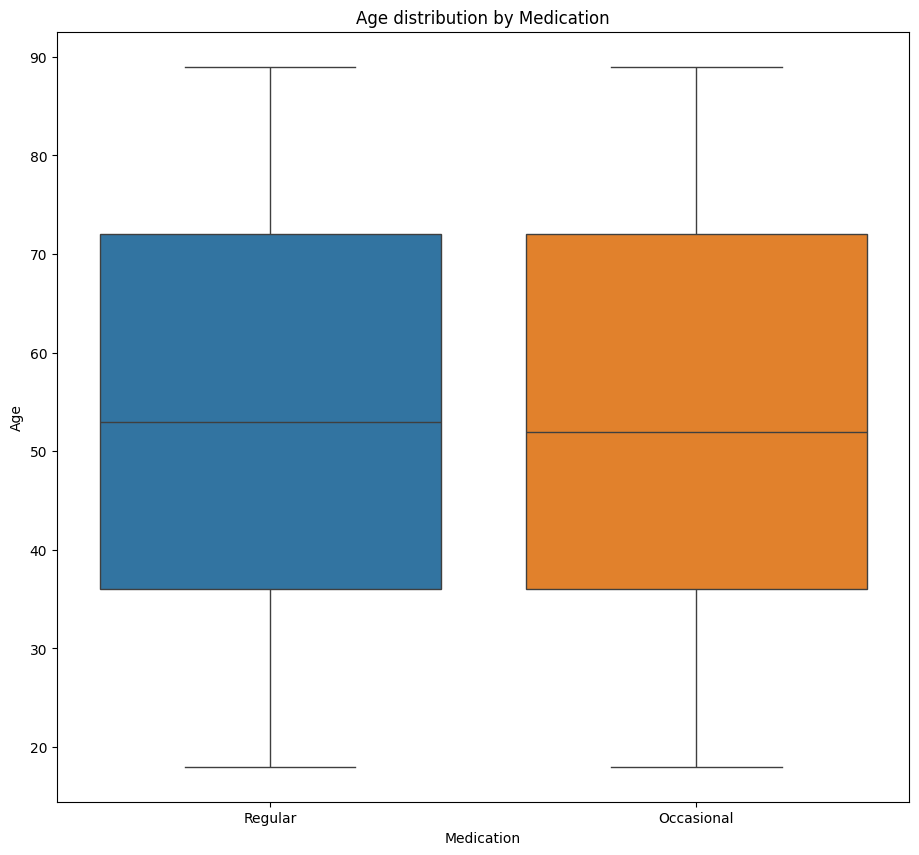

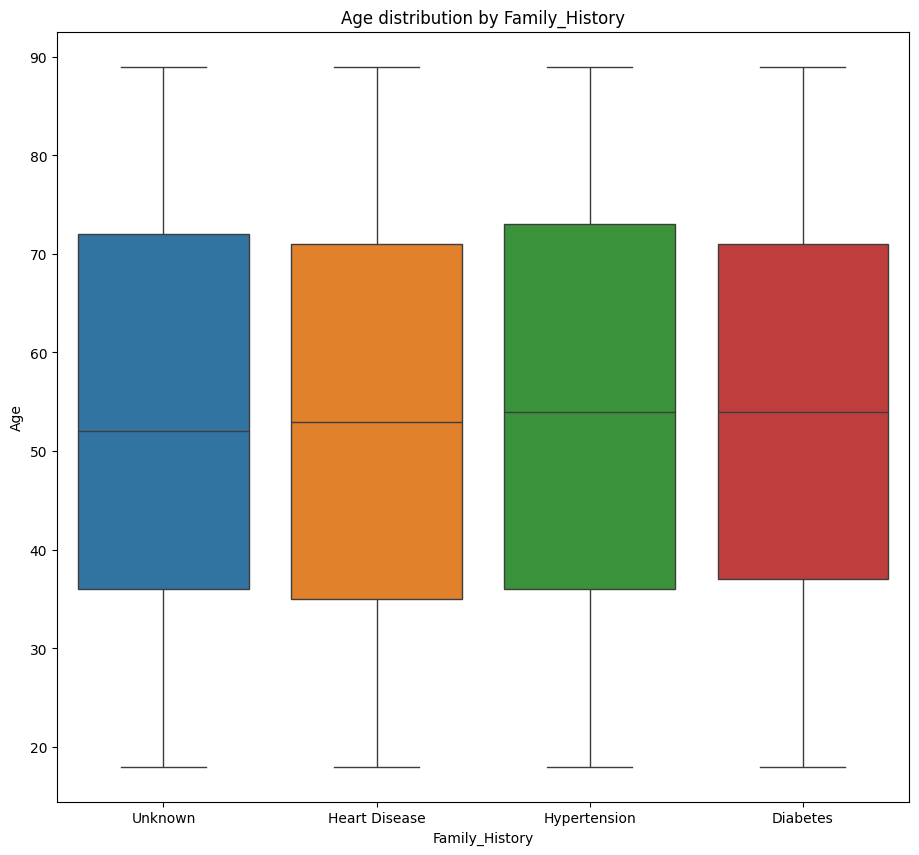

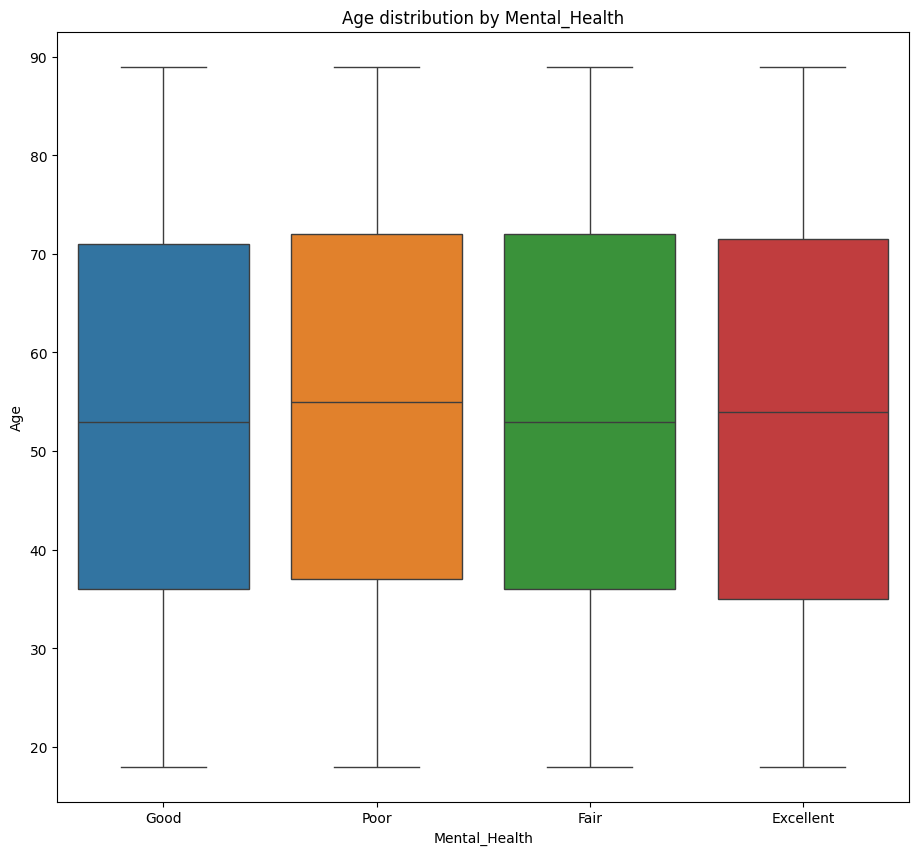

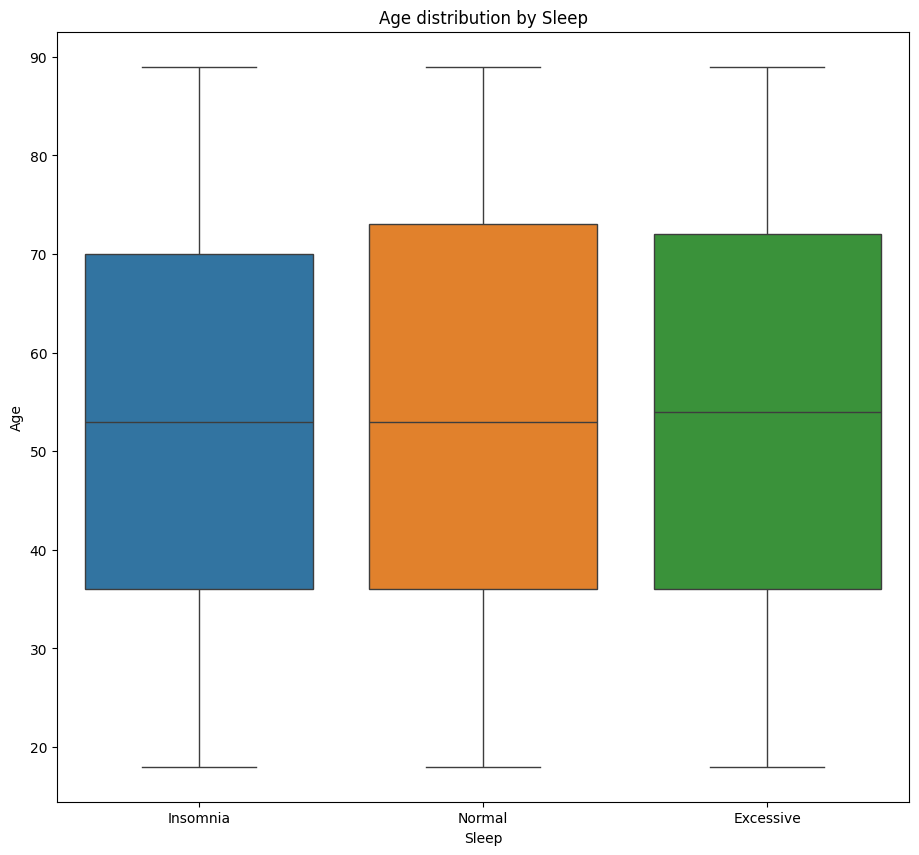

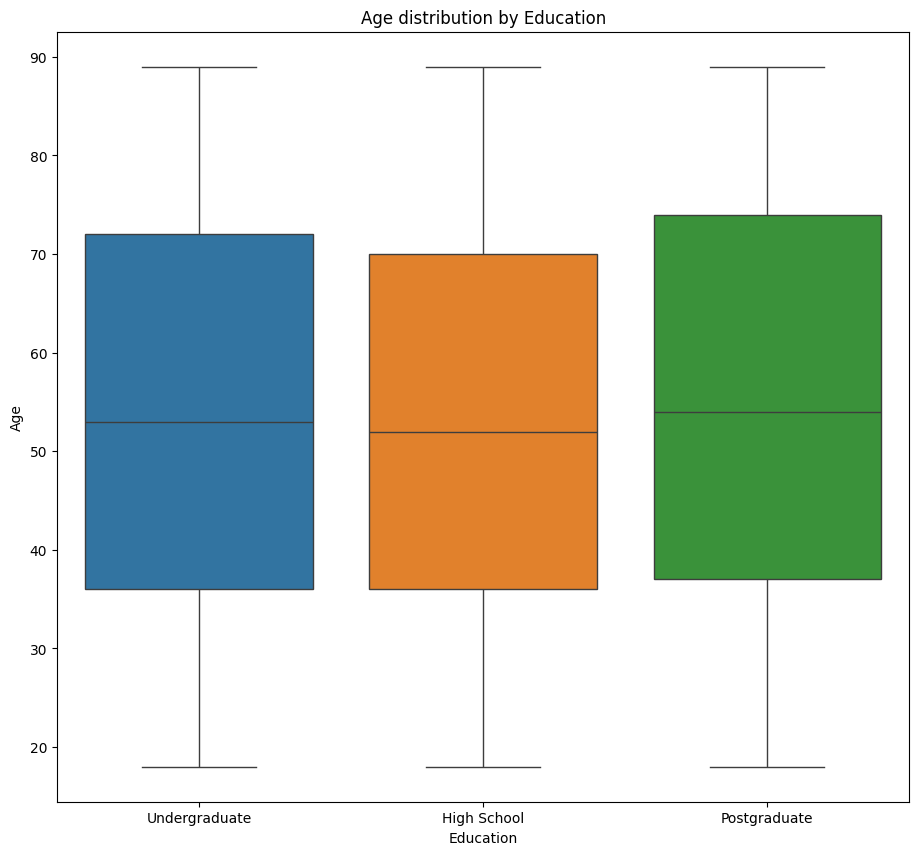

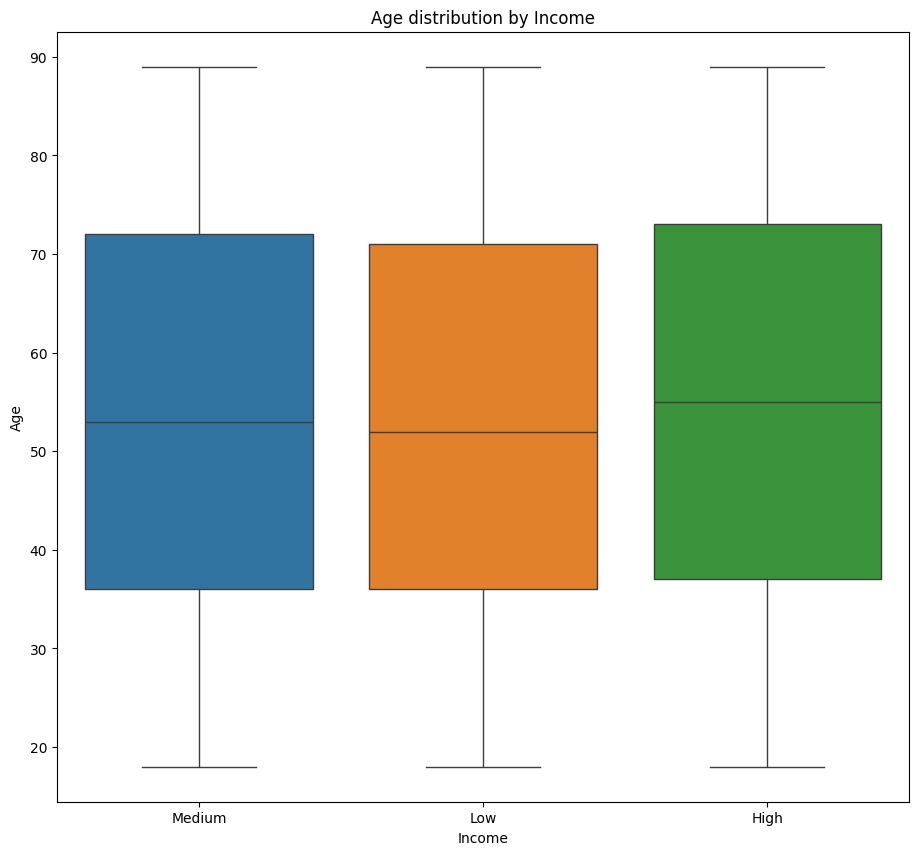

In [ ]:
for category in categorical_features:
    f, ax = plt.subplots(figsize=(11,10))
    plt.title(f'Age distribution by {category}')
    sns.boxplot(data=df, y='Age', x=category, hue=category)
    plt.show()
    plt.close()   

### Các biến số

C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_6256\3664345581.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)


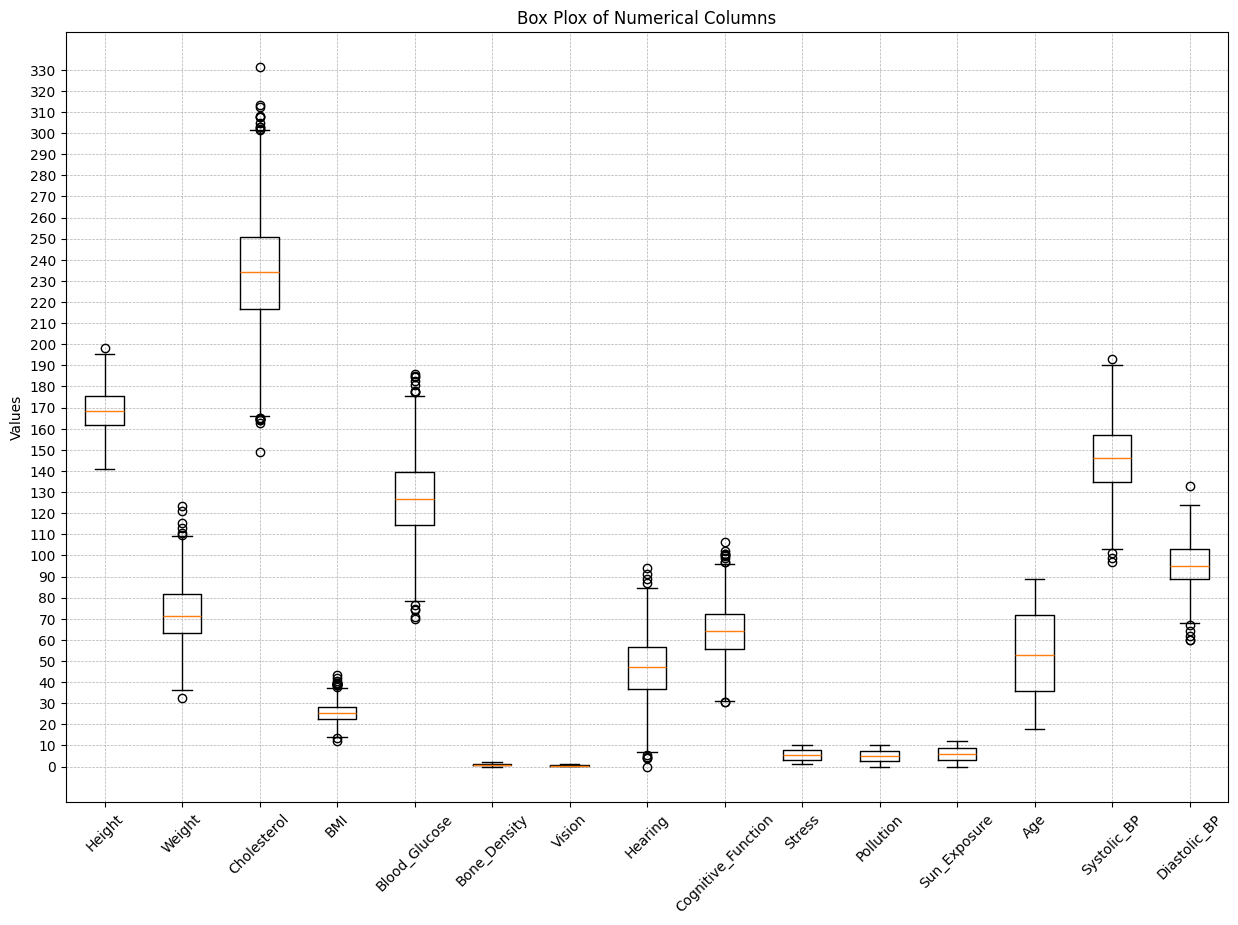

In [ ]:
plt.figure(figsize=(15,10))
plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)
plt.title("Box Plox of Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)
plt.yticks(range(int(data[numeric_columns].min().min()), int(data[numeric_columns].max().max())+1,10))
plt.show()

### thay thế các giá trị nhỏ hơn cận dưới bằng cận dưới, lớn hơn cận trên bằng cận trên

In [13]:
def cap_outliers(data, numeric_columns, factor=1.5):
    capped_data = data.copy()
    
    for col in numeric_columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - factor * IQR
        upper_bound = Q3 + factor * IQR
        
        capped_data[col] = data[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)
        
    return capped_data


data = cap_outliers(data,numeric_columns,1.5)


### Vẽ biểu đồ sau khi xử lý các outliers

C:\Users\DELL.DESKTOP-QUFQM0F\AppData\Local\Temp\ipykernel_23692\3664345581.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)


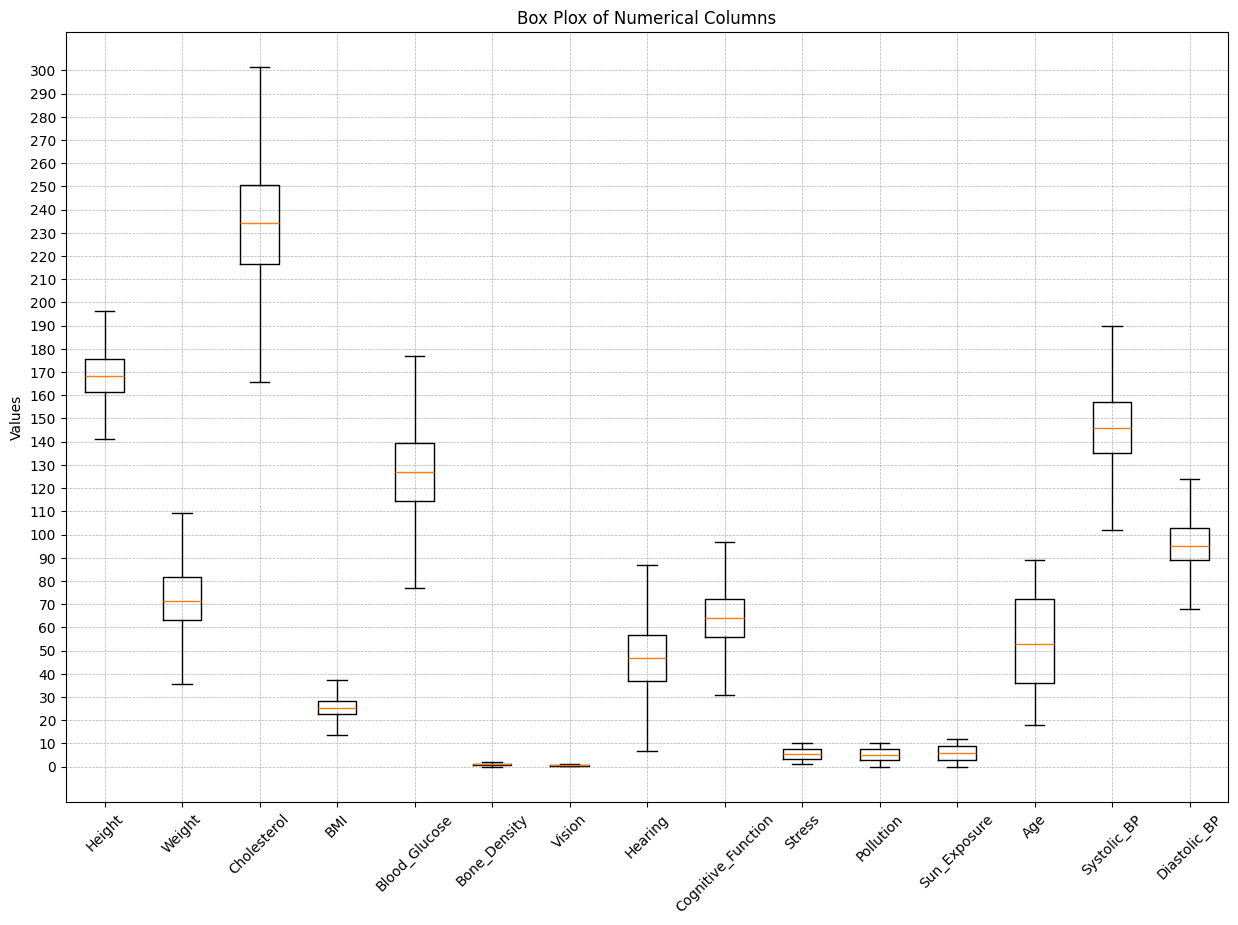

In [14]:
plt.figure(figsize=(15,10))
plt.boxplot([data[col] for col in numeric_columns], labels=numeric_columns)
plt.title("Box Plox of Numerical Columns")
plt.xticks(rotation=45)
plt.ylabel("Values")
plt.grid(linestyle="--", linewidth=0.5)
plt.yticks(range(int(data[numeric_columns].min().min()), int(data[numeric_columns].max().max())+1,10))
plt.show()

### Nhận xét

Sau khi thay thế các giá trị dưới cận dưới bằng cận dưới và các giá trị trên cận trên bằng cận trên, dữ liệu đã có một số thay đổi đáng kể trong việc phân phối của các biến số:

- Thu hẹp khoảng giá trị: Do các giá trị đã bị thay thế tại hai đầu khoảng, các biến số hiện có khoảng giá trị nhỏ hơn. Điều này giúp phân phối dữ liệu tập trung hơn trong một phạm vi xác định, từ đó giảm thiểu giá trị mang tính bất ngờ không cần thiết trong dữ liệu.